<a href="https://colab.research.google.com/github/brendampa/challenge-python-AluraStore/blob/main/AluraStoreBr_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
#Adicionando uma coluna identificadora para cada loja

loja['loja'] = 'loja1'
loja2['loja'] = 'loja2'
loja3['loja'] = 'loja3'
loja4['loja'] = 'loja4'

#verificando com a loja 1
print(loja.head())


                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon   loja  
0    cartao_credito                       8 -22.19 -48.79  loja1  
1    cartao_

In [ ]:
#Compilando as informações de todas as lojas

lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

In [ ]:
#Faturamento por loja
faturamento = lojas.groupby('loja')['Preço'].sum()
print(faturamento)

loja
loja1    1534509.12
loja2    1488459.06
loja3    1464025.03
loja4    1384497.58
Name: Preço, dtype: float64


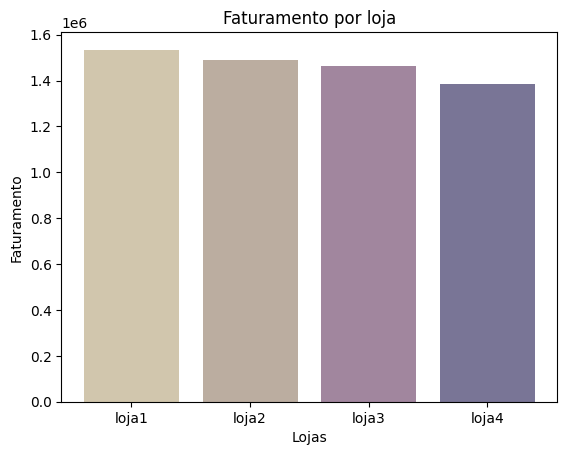

In [ ]:
#Criando um gráfico de pizza para verificar a parcela de cada loja

import matplotlib.pyplot as plt

lojastotal = ['loja1', 'loja2', 'loja3', 'loja4']
faturamento = lojas.groupby('loja')['Preço'].sum()
#plt.pie(faturamento, labels=lojastotal,autopct='%1.1f%%', colors=['#d1c6ad','#bbada0','#A1869E','#797596'])
plt.bar(lojastotal, faturamento, color=['#d1c6ad','#bbada0','#A1869E','#797596'])
plt.title('Faturamento por loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.show()

In [ ]:
#Faturamento por categoria

# Somar os preços por produto
soma_preco = lojas.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Calcular a % acumulada
porcentagem_acumulada = round(soma_preco.cumsum() / soma_preco.sum() * 100, 2)

# Criar o DataFrame final
df_preco = pd.DataFrame({
    'Faturamento': soma_preco,
    '%Acumulado': porcentagem_acumulada
})

# Exibir o resultado
print(df_preco)


                       Faturamento  %Acumulado
Categoria do Produto                          
eletronicos             2214099.72       37.71
eletrodomesticos        1766337.03       67.79
moveis                  1010214.00       85.00
instrumentos musicais    465029.67       92.92
esporte e lazer          190635.39       96.16
brinquedos                98140.86       97.84
utilidades domesticas     76773.38       99.14
livros                    50260.74      100.00


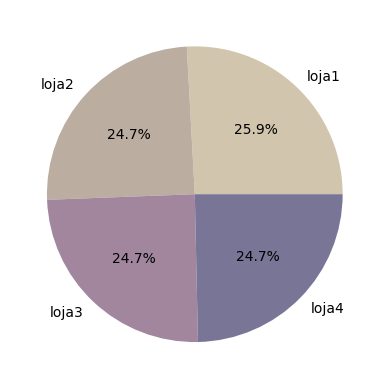

In [ ]:
#Dentro das três categorias, qual loja representa mais?
#Eletrônicos

import matplotlib.pyplot as plt

#Filtrar a categoria desejada
categoria_escolhida = 'eletronicos'
filtro_categoria = lojas[lojas['Categoria do Produto'] == categoria_escolhida]

#Agrupar por loja e somar o Preço
faturamento_por_loja = filtro_categoria.groupby('loja')['Preço'].sum().sort_values(ascending=False)

#gráfico
plt.pie(faturamento_por_loja, labels=faturamento_por_loja.index,autopct='%1.1f%%', colors=['#d1c6ad','#bbada0','#A1869E','#797596'])

plt.show()

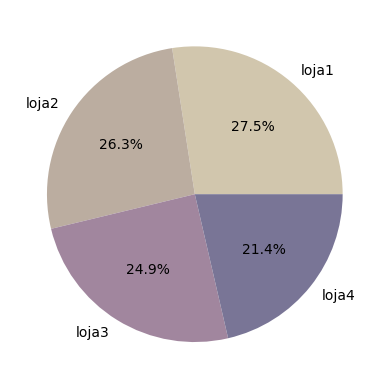

In [ ]:
#Dentro das três categorias, qual loja representa mais?
#Eletrodomesticos

import matplotlib.pyplot as plt

#Filtrar a categoria desejada
categoria_escolhida = 'eletrodomesticos'
filtro_categoria = lojas[lojas['Categoria do Produto'] == categoria_escolhida]

#Agrupar por loja e somar o Preço
faturamento_por_loja = filtro_categoria.groupby('loja')['Preço'].sum().sort_values(ascending=False)

#gráfico
plt.pie(faturamento_por_loja, labels=faturamento_por_loja.index,autopct='%1.1f%%', colors=['#d1c6ad','#bbada0','#A1869E','#797596'])

plt.show()

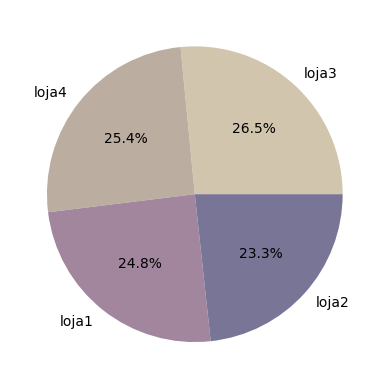

In [ ]:
#Dentro das três categorias, qual loja representa mais?
#Móveis

import matplotlib.pyplot as plt

#Filtrar a categoria desejada
categoria_escolhida = 'moveis'
filtro_categoria = lojas[lojas['Categoria do Produto'] == categoria_escolhida]

#Agrupar por loja e somar o Preço
faturamento_por_loja = filtro_categoria.groupby('loja')['Preço'].sum().sort_values(ascending=False)

#gráfico
plt.pie(faturamento_por_loja, labels=faturamento_por_loja.index,autopct='%1.1f%%', colors=['#d1c6ad','#bbada0','#A1869E','#797596'])

plt.show()

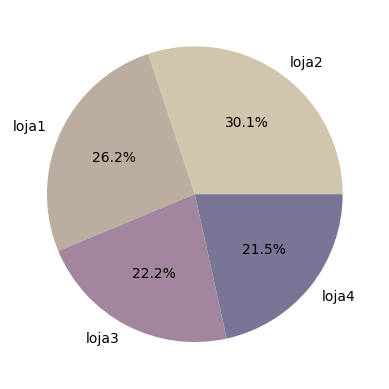

In [ ]:
#Dentro das três categorias, qual loja representa mais?
#Instrumentos musicais

import matplotlib.pyplot as plt

#Filtrar a categoria desejada
categoria_escolhida = 'instrumentos musicais'
filtro_categoria = lojas[lojas['Categoria do Produto'] == categoria_escolhida]

#Agrupar por loja e somar o Preço
faturamento_por_loja = filtro_categoria.groupby('loja')['Preço'].sum().sort_values(ascending=False)

#gráfico
plt.pie(faturamento_por_loja, labels=faturamento_por_loja.index,autopct='%1.1f%%', colors=['#d1c6ad','#bbada0','#A1869E','#797596'])

plt.show()

In [ ]:
#Faturamento por produto
soma_preco_prod = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

porcentagem_acumulada_prod = round(soma_preco_prod.cumsum()/soma_preco_prod.sum()*100,2)

df_fat_produto = pd.DataFrame ({
    'Faturamento': soma_preco_prod,
    '%Acumulado': porcentagem_acumulada_prod
})
print(df_fat_produto)

                             Faturamento  %Acumulado
Produto                                             
TV Led UHD 4K                  576652.70        9.82
Celular Plus X42               534735.14       18.93
Geladeira                      513249.34       27.67
Smart TV                       386963.12       34.26
Lavadora de roupas             323292.37       39.77
Lava louças                    320715.58       45.23
Tablet ABXY                    292016.76       50.20
Secadora de roupas             280317.31       54.98
Celular ABXY                   210547.77       58.56
Bateria                        197074.45       61.92
Cama king                      181040.36       65.00
Fogão                          174495.19       67.97
Guitarra                       172539.87       70.91
Sofá retrátil                  164371.85       73.71
Micro-ondas                    154267.24       76.34
Cama box                       138797.42       78.70
Bicicleta                      128648.29      

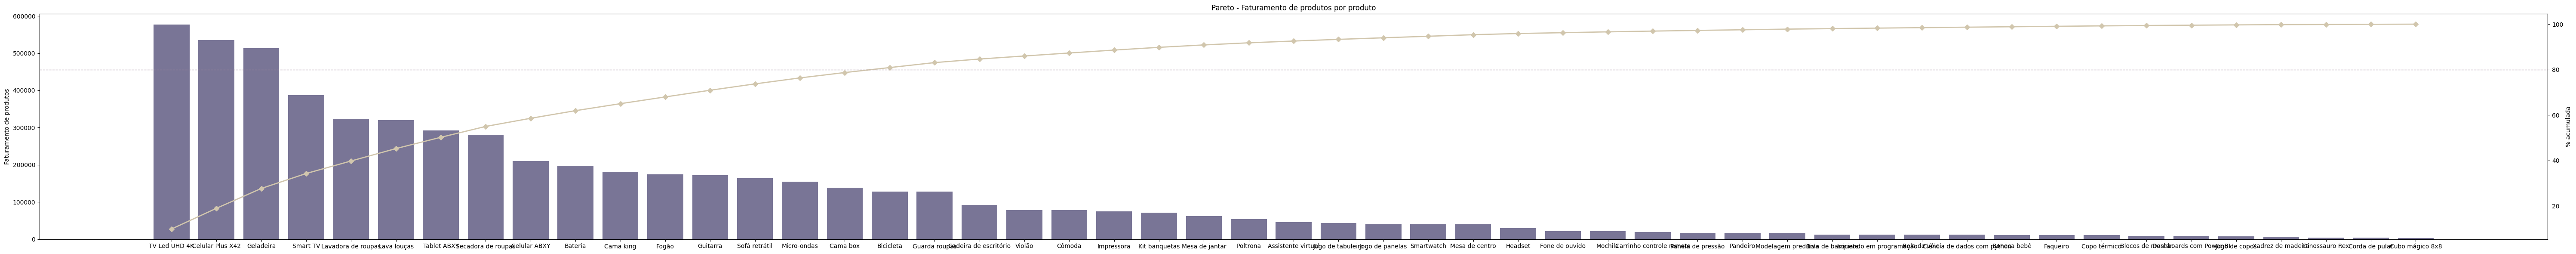

In [ ]:
#Pareto com Faturamento acumulado por produto

import matplotlib.pyplot as plt

soma_faturamento_produtos = lojas.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
porcentagem_acumulada = round(soma_faturamento_produtos.cumsum() / soma_faturamento_produtos.sum() *100,2)

produtos = soma_faturamento_produtos.index
produtos_valores = soma_faturamento_produtos.values

#gráfico
fig, ax1 = plt.subplots(figsize=(60, 6)) # figsize=(10, 6) dá mais espaço para o gráfico

#barras
ax1.bar(produtos, produtos_valores, color = '#797596')
ax1.set_ylabel('Faturamento de produtos')
ax1.set_title('Pareto - Faturamento de produtos por produto')

#linhas de % acumulada

ax2 = ax1.twinx()
ax2.plot(produtos, porcentagem_acumulada, color = '#d1c6ad', marker = 'D', linestyle = '-', linewidth = 2)
ax2.set_ylabel('% acumulada')

#linha de referência 80%
ax2.axhline(80, color = '#A1869E', linestyle = 'dashed', linewidth = 1)

# Ajustar as descrições do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático de layout para evitar sobreposição

plt.show()

# 2. Vendas por Categoria


In [ ]:
#Quantidade de produtos vendidos por categoria em cada loja

contagem_categoria = lojas['Categoria do Produto'].value_counts()
porcentagem_acumulada = round(contagem_categoria.cumsum() / contagem_categoria.sum() *100,2)

df_categoria = pd.DataFrame({'Quantidade': contagem_categoria,
                              '%Acumulada': porcentagem_acumulada })

print(df_categoria)

                       Quantidade  %Acumulada
Categoria do Produto                         
moveis                       1886       19.99
eletronicos                  1772       38.77
brinquedos                   1290       52.44
eletrodomesticos             1149       64.62
esporte e lazer              1113       76.42
instrumentos musicais         753       84.40
livros                        742       92.26
utilidades domesticas         730      100.00


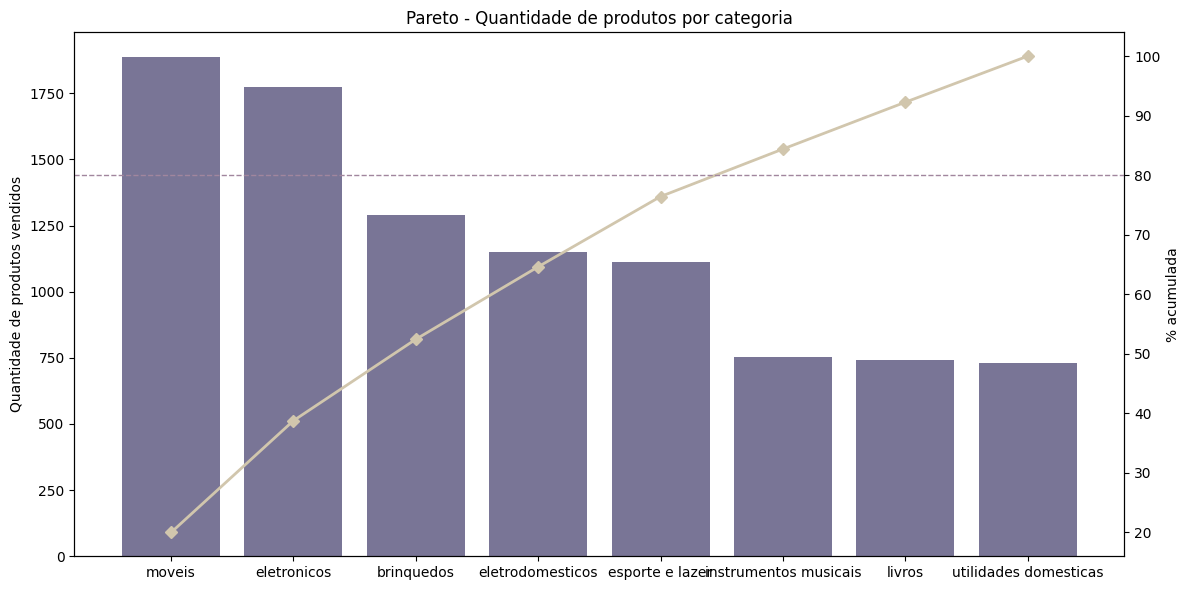

In [ ]:
#gráfico pareto para verificar categorias mais vendida em todas as lojas

import matplotlib.pyplot as plt
contagem_categoria = lojas['Categoria do Produto'].value_counts()

categorias = contagem_categoria.index
categorias_valores = contagem_categoria.values

porcentagem_acumulada = contagem_categoria.cumsum() / contagem_categoria.sum() *100

#gráfico
fig, ax1 = plt.subplots(figsize=(12, 6)) # figsize=(10, 6) dá mais espaço para o gráfico

#barras
ax1.bar(categorias, categorias_valores, color = '#797596')
ax1.set_ylabel('Quantidade de produtos vendidos')
ax1.set_title('Pareto - Quantidade de produtos por categoria')

#linhas de % acumulada

ax2 = ax1.twinx()
ax2.plot(categorias, porcentagem_acumulada, color = '#d1c6ad', marker = 'D', linestyle = '-', linewidth = 2)
ax2.set_ylabel('% acumulada')

#linha de referência 80%
ax2.axhline(80, color = '#A1869E', linestyle = 'dashed', linewidth = 1)

# Ajustar as descrições do eixo X
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajuste automático de layout para evitar sobreposição

plt.show()

In [ ]:
#Quantidade de produtos vendidos por categoria - loja 1

contagem_categoria1 = loja['Categoria do Produto'].value_counts()
porcentagem_acumulada1 = round(contagem_categoria1.cumsum() / contagem_categoria1.sum() *100,2)

df_categoria1 = pd.DataFrame({'Quantidade': contagem_categoria1,
                              '%Acumulada1': porcentagem_acumulada1 })

print(df_categoria1)

                       Quantidade  %Acumulada1
Categoria do Produto                          
moveis                        465        19.71
eletronicos                   448        38.70
brinquedos                    324        52.44
eletrodomesticos              312        65.66
esporte e lazer               284        77.70
instrumentos musicais         182        85.42
livros                        173        92.75
utilidades domesticas         171       100.00


In [ ]:
#Quantidade de produtos vendidos por categoria - loja 2

contagem_categoria2 = loja2['Categoria do Produto'].value_counts()
porcentagem_acumulada2 = round(contagem_categoria2.cumsum() / contagem_categoria2.sum() *100,2)

df_categoria2 = pd.DataFrame({'Quantidade': contagem_categoria2,
                              '%Acumulada2': porcentagem_acumulada2 })

print(df_categoria2)

                       Quantidade  %Acumulada2
Categoria do Produto                          
moveis                        442        18.74
eletronicos                   422        36.63
brinquedos                    313        49.89
eletrodomesticos              305        62.82
esporte e lazer               275        74.48
instrumentos musicais         224        83.98
livros                        197        92.33
utilidades domesticas         181       100.00


In [ ]:
#Quantidade de produtos vendidos por categoria - loja 3

contagem_categoria3 = loja3['Categoria do Produto'].value_counts()
porcentagem_acumulada3 = round(contagem_categoria3.cumsum() / contagem_categoria3.sum() *100,2)

df_categoria3 = pd.DataFrame({'Quantidade': contagem_categoria3,
                              '%Acumulada3': porcentagem_acumulada3 })

print(df_categoria3)

                       Quantidade  %Acumulada3
Categoria do Produto                          
moveis                        499        21.15
eletronicos                   451        40.27
brinquedos                    315        53.62
eletrodomesticos              278        65.41
esporte e lazer               277        77.15
livros                        185        84.99
instrumentos musicais         177        92.50
utilidades domesticas         177       100.00


In [ ]:
#Quantidade de produtos vendidos por categoria - loja 4

contagem_categoria4 = loja4['Categoria do Produto'].value_counts()

porcentagem_acumulada4 = round(contagem_categoria4.cumsum() / contagem_categoria4.sum() *100,2)

df_categoria4 = pd.DataFrame({'Quantidade': contagem_categoria4,
                              '%Acumulada4': porcentagem_acumulada4 })

print(df_categoria4)

                       Quantidade  %Acumulada4
Categoria do Produto                          
moveis                        480        20.36
eletronicos                   451        39.48
brinquedos                    338        53.82
esporte e lazer               277        65.56
eletrodomesticos              254        76.34
utilidades domesticas         201        84.86
livros                        187        92.79
instrumentos musicais         170       100.00


# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao = lojas.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)
print(media_avaliacao)

loja
loja3    4.048326
loja2    4.037304
loja4    3.995759
loja1    3.976685
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Usando o dataframe lojas:
# Contar quantas vezes cada produto foi vendido em cada loja
vendas_por_produto_loja = lojas.groupby(['loja','Produto']).size().reset_index(name = 'Quantidade' )

# Encontrar o mais vendido por loja
mais_vendido = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('loja')['Quantidade'].idxmax()].reset_index(drop=True)
mais_vendido['Destaque'] = 'Mais vendido'

# Encontrar o menos vendido por loja
menos_vendido = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('loja')['Quantidade'].idxmin()].reset_index(drop=True)
menos_vendido['Destaque'] = 'Menos vendido'

destaques = pd.concat([mais_vendido, menos_vendido], ignore_index=True)
print(destaques.sort_values(by='loja'))

    loja                   Produto  Quantidade       Destaque
0  loja1             Guarda roupas          60   Mais vendido
4  loja1              Celular ABXY          33  Menos vendido
1  loja2  Iniciando em programação          65   Mais vendido
5  loja2         Jogo de tabuleiro          32  Menos vendido
2  loja3             Kit banquetas          57   Mais vendido
6  loja3          Blocos de montar          35  Menos vendido
3  loja4                  Cama box          62   Mais vendido
7  loja4                  Guitarra          33  Menos vendido


# 5. Frete Médio por Loja


In [ ]:
frete_medio_lojas = lojas.groupby('loja')['Frete'].mean().sort_values(ascending=False)
print(frete_medio_lojas)

loja
loja1    34.691805
loja2    33.621941
loja3    33.074464
loja4    31.278997
Name: Frete, dtype: float64


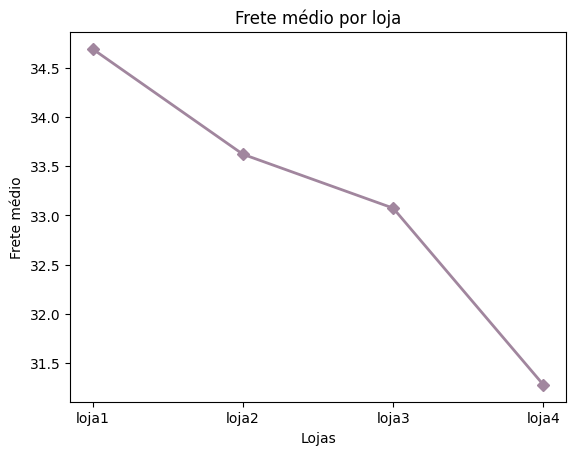

In [ ]:
#gráfico de linhas com o frete médio por loja
import matplotlib.pyplot as plt

lojastotal = ['loja1', 'loja2', 'loja3', 'loja4']
frete_medio_lojas = lojas.groupby('loja')['Frete'].mean().sort_values(ascending=False)

plt.plot(lojastotal, frete_medio_lojas, color = '#A1869E', marker = 'D', linestyle = '-', linewidth = 2)
plt.title('Frete médio por loja')
plt.xlabel('Lojas')
plt.ylabel('Frete médio')
plt.show()

# **ANÁLISE**

A análise consiste em verificar os indicadores de cada loja a fim de definir qual loja deve ser vendida pelo Sr. João.
Para esta análise, optei por analisar os indicadores gerais da empresa x indicadores individuais de cada loja.

- Inicialmente, foi analisado o Faturamento:

A loja com maior faturamento foi a loja1;
A loja com menor faturamento foi a loja4.

Em seguida analisei o faturamento em relação a categoria dos produtos.
Total de faturamento por categoria - considerando todas as lojas:

Categoria do Produto por ordem -            
eletronicos, eletrodomesticos, moveis, instrumentos musicais, esporte e lazer , brinquedos, utilidades domesticas, livros

Porém, 80% do faturamento está distribúido nas categorias:
1.eletronicos

2.eletrodomesticos

3.moveis


Também foi analisado dentro das três categorias qual loja representa menos.

Na categoria Eletrônicos, as lojas que menos representam no faturamento são as 2, 3 e 4 empatadas com 24,7%.
Na categoria Eletrodomésticos, a loja que menos representa no faturamento é a 4 com 21,4%
Na categoria Móveis, a loja que menos representa no faturamento é a 2 com 23,3%

Apesar da loja 2 ter uma menor representatividade na terceira categoria de maior faturamento, a loja 4 aparece como a última nas duas primeiras categorias.

A fim de confirmação, analisei a quarta categoria de maior faturamento e a loja que menos representa no percentual faturado é a loja 4 com 21,5%.

- Categoria x Quantidade de vendas

Considerando todas as lojas, as categorias que representam 80% das vendas são:

1.moveis

2.eletronicos

3.brinquedos

4.eletrodomesticos

5.esporte e lazer

Foi possível constatar que de todas as lojas, apenas a loja 4 não tem a categoria "eletrodomésticos" no ranking de 4 categorias mais vendidas.
É importante observar que essa categoria está entre as três que mais geram faturamento.
A quarta categoria que mais gera faturamento é "instrumentos musicais" e está em último lugar em vendas na loja 4.

- Produtos mais e menos vendidos
Analisando os produtos que represnetam no geral 80% do faturamento, assim como os produtos mais e menos vendidos de cada loja podemos conferir que nas lojas 1, 2 e 3 os produtos amis vendidos não estão nos 80% que mais faturam, porém também ñao temos nenhum dos mais faturados entre os menos vendidos.

Na loja 4 o mais vendido está a lista dos produtos que mais geram faturamento, porém o menos vendido também está. Ou seja, um produto classe A não está tendo boa saída na loja.

- Avaliações das lojas

loja3    4.048326

loja2    4.037304

loja4    3.995759

loja1    3.976685


A variação de notas entre a maior e a menor é de apenas 0.071641, o que considerei muito baixo. Para essa tomada de decisão em específico, acredito não ser tão relevante.

- Conclusão

Após análise e explicações anteriores, recomendo ao Sr. João que a loja 4 seja vendida.
